# E-commerce Linear Regression
A project example of using a linear regression model. By fitting a model and analysing coefficients, we can help an e-commerce company decide whether to focus on development of their website or mobile app.

The dataset consists of the following features:
* `Email` (customer's email address),
* `Address` (customer's residential address),
* `Avatar` (the color of customer's avatar on their website profile),
* `Avg. Session Length` (average time of in-store style advice sessions, in minutes),
* `Time on App` (average time spent on the mobile app, in minutes),
* `Time on Website` (average time spent on the website, in minutes),
* `Length of Membership` (number of years the customer has been a member),
* `Yearly Amount Spent` (average amount spent on online clothing purchases in the store per year, in USD).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
customers = pd.read_csv('./data/ecommerce_customers.csv')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

Drop unused columns:

In [6]:
customers.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)

Scatter plot of `Yearly Amount Spent` against `Time on Website` with histograms of each variable:

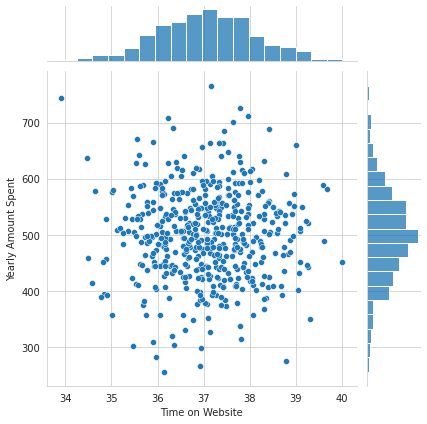

In [7]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

Scatter plot of `Yearly Amount Spent` against `Time on App` with histograms of each variable:

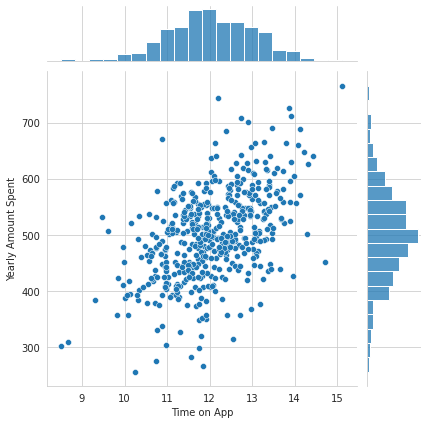

In [8]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

A hex plot of `Length of Membership` against `Time on App` with histograms of each variable:

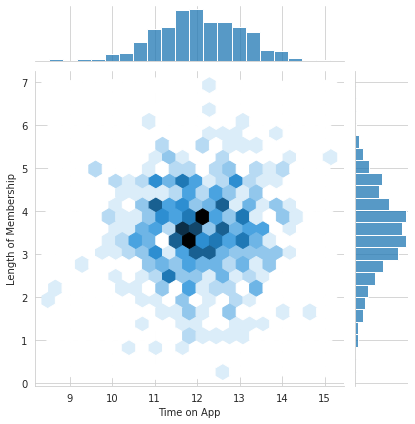

In [9]:
sns.jointplot(data=customers, x='Time on App', y='Length of Membership', kind='hex')

A grid of scatter plots showing the relationships between each feature, with diagonal histplots:

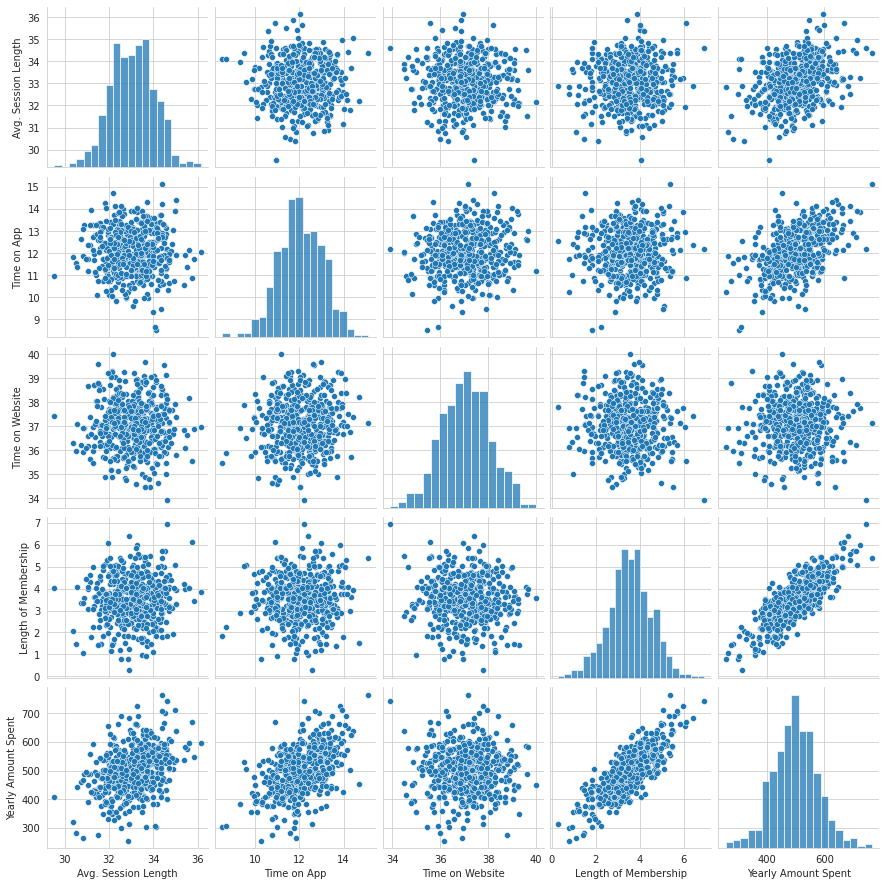

In [10]:
sns.pairplot(customers)

A table of correlations between each feature:

In [11]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


From the above table, we can see that the most correlated feature with `Yearly Amount Spent` is the `Length of Membership`.

Let's create a scatter plot of both features with a regression line:

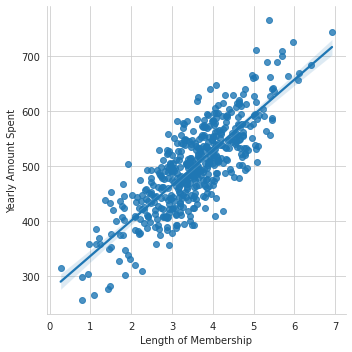

In [12]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')

## Modeling

In [13]:
X = customers.drop('Yearly Amount Spent', axis=1)
y = customers['Yearly Amount Spent']

Splitting the dependent (y) and independent (X) variables on training and teststing sets:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=8801)

Training the model:

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Let's print the regression equation with coefficients from the trained model:

In [16]:
regression_equation = ''
for i in range(len(X.columns)-1):
  regression_equation += f'{str(np.round(lin_reg.coef_[i], 3))} * "{X.columns[i]}" + '

regression_equation = f'{y.name} = {regression_equation}{str(np.round(lin_reg.coef_[-1], 3))} * "{X.columns[-1]}" + {str(np.round(lin_reg.intercept_, 3))}'
print(regression_equation)

Yearly Amount Spent = 25.468 * "Avg. Session Length" + 38.525 * "Time on App" + 0.688 * "Time on Website" + 61.987 * "Length of Membership" + -1051.213


Making predictions:

In [17]:
y_pred = lin_reg.predict(X_test)

Scatterplot of the `predictions` against the `ground truth`:

<AxesSubplot:xlabel='Yearly Amount Spent'>

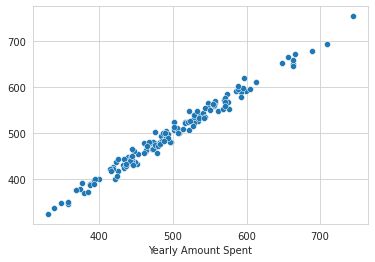

In [18]:
sns.scatterplot(x=y_test, y=y_pred)

Evaluating the model's performance by calculating the residual sum of squares and the explained variance score (R squared):

In [19]:
print(f'MAE: {np.round(metrics.mean_absolute_error(y_test, y_pred), 3)}')
print(f'MSE: {np.round(metrics.mean_squared_error(y_test, y_pred), 3)}')
print(f'RMSE: {np.round(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)), 3)}')
print(f'R2: {np.round(metrics.explained_variance_score(y_test, y_pred), 3)}')

MAE: 8.154
MSE: 101.313
RMSE: 2.855
R2: 0.983


The above metrics show that we have gotten a near ideal fit (RMSE of almost $3).

Let's plot the residuals so that we can make sure they are normally distributed:

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

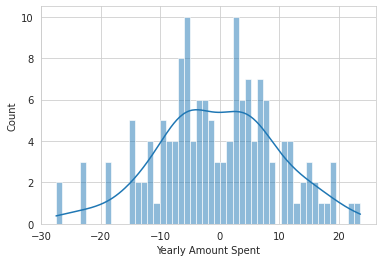

In [20]:
sns.histplot((y_test - y_pred), bins=50, kde=True)

## Conclusions
To make a valuable insight for the e-commerce company, let's take a better look at the coefficients of our model:

In [21]:
pd.DataFrame(lin_reg.coef_, index=X.columns, columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.467896
Time on App,38.524907
Time on Website,0.688434
Length of Membership,61.986978


From the above table we can see that the biggest impact on the `Yearly Amount Spent` has the `Length of Membership`. This means that the, quite obvious, priority of the company is to keep their customers being members as long as possible (on average, a customer shops for almost $62 worth of apparel more each year they remain the store's member).

But to answer the first question "Is it better to invest in the development of the website or mobile application?", we have to compare the coefficients of `Time on App` and `Time on Website`. Our linear regression model shows that with each minute spent on the moblie app, a store gains an average $38.5 by selling their clothing. This is a far better result than that of a time spent on website - each minute on the website helps the company sell around $0.7 worth of merchandise.

We can draw two conclusions:
1. The mobile app performs a lot better than the website, so the company's sales will not be impacted much by reducing the development of the website.
2. Since the mobile app already shows good performance, the company might want to focus on the website development to boost sales thru the website, which might show the same or similar performance as the mobile app.